<h1 align = "center" >AI in Cardiology: Predicting Heart Attacks with Machine Learning </h1>

<a id=63></a>
### Table of  Content
1. [Introduction]
2. [Exploratory Data Analysis(EDA)]
3. [Preparation for Modelling]
4. [Modelling]
    * 4.1 [Logistic Regression Algorithm]
        * 4.1.1 [Cross Validation]
        * 4.1.2 [Hyperparameter Optimization(**With GridSearchCV**)]
    * 4.2 [Decision Tree Algorithm]
    * 4.3 [Support Vector Machine Algorithm]
    * 4.4 [Random Forest Algorithm]
    * 4.5 [Hyperparameter Optimization(**With GridSearchCV**)]


# Introduction

#### What is Heart Attack?

* The medical name of heart attack is “Myocardial infarction”.
* Heart attack in short; It is the occlusion of the vessel by plaque-like lesions filled with cholesterol and fat.
* The lesion is called abnormal conditions that occur in the organs where the disease is located.
* As a result of the blockage, the blood flow is completely cut off and a heart attack that can lead to death occurs.

## Data Description

**Variable definitions in the Dataset**

- **_Age_**: Age of the patient
- **_Sex:_** Sex of the patient
- **_exang:_** exercise induced angina (1 = yes; 0 = no)
- **_ca:_** number of major vessels (0-3)
- **_cp:_** Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- **_trtbps:_** resting blood pressure (in mm Hg)
- **_chol:_** cholestoral in mg/dl fetched via BMI sensor
- **_fbs:_** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **_rest_ecg:_** resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **_thalach:_** maximum heart rate achieved
- **_target:_** 0= less chance of heart attack 1= more chance of heart attack


**Additional variable descriptions to help us**

1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

#### Loading The Dataset <a id = 7></a>

In [2]:
!mkdir -p /content/dataset/

In [3]:
df = pd.read_csv("/content/dataset/heart.csv")

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 2.3 Initial analysis on the dataset <a id = 8></a>

In [9]:
rename_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [10]:
df.columns = rename_columns

In [11]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* The Data Set consists of 303 Rows and 14 Columns.
* The type of all the variables in the data set are in numerical format. (Integer Or Float)
* According to first impressions, there is no missing value(NaN Value) in the data set.

### Preparation for Exploratory Data Analysis(EDA) <a id = 10></a>

#### Examining Missing Values <a id = 11></a>

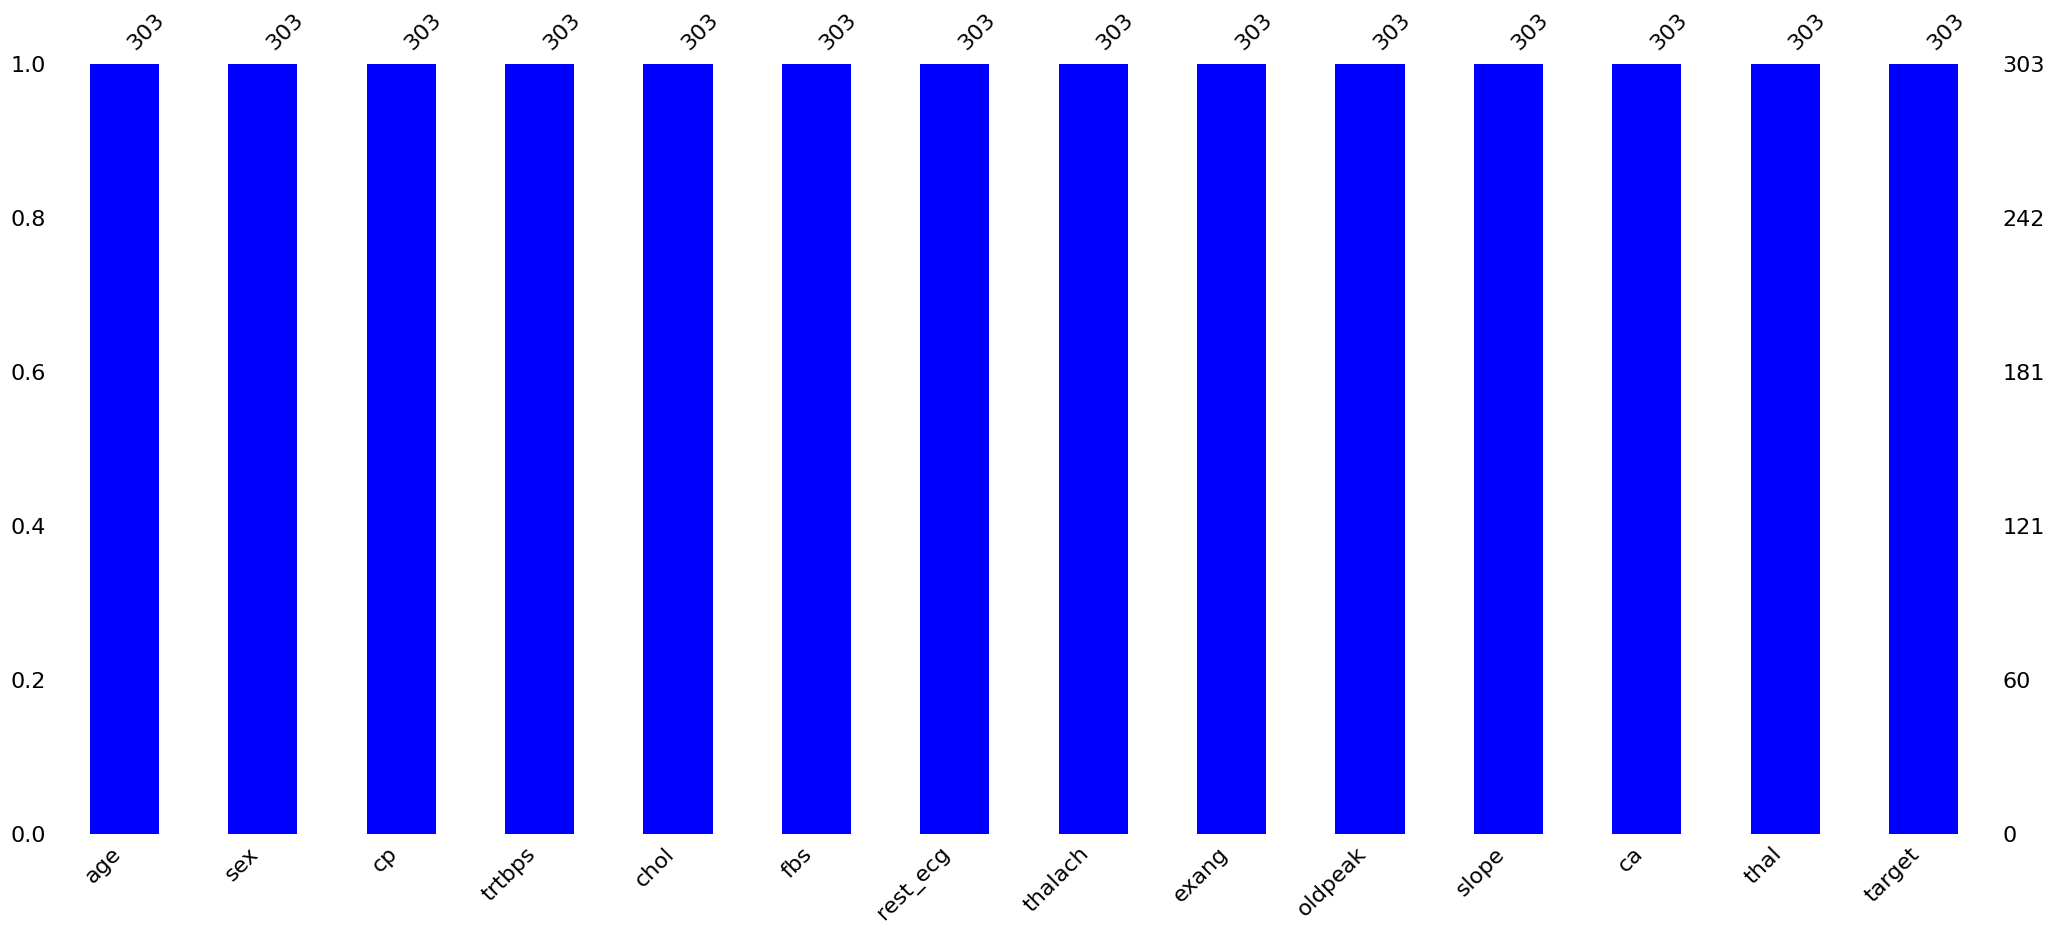

In [24]:
import missingno

missingno.bar(df, color = "b")
plt.show()

#### Examining Unique Values <a id = 12></a>

In [20]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40



* **According to the result from the unique value dataframe;**
* We determined the variables with few unique values ​​as categorical variables, and the variables with high unique values ​​as numeric variables.
* In this context, **Numeric Variables:** “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
* **Categorical Variables:** "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"
* In the next section, we will separate these 2 groups into 2 different lists.

#### Separating variables (Numeric or Categorical) <a id = 14></a>


In [25]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### Exploratory Data Analysis(EDA) <a id = 17></a>


#### Uni-variate Analysis <a id = 18></a>

#### Numerical Variables(Analysis with **Distplot**)<a id = 19></a>

In [32]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [33]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [34]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

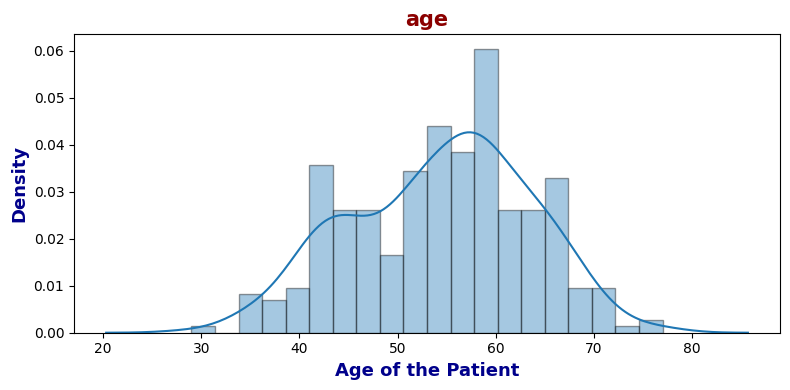

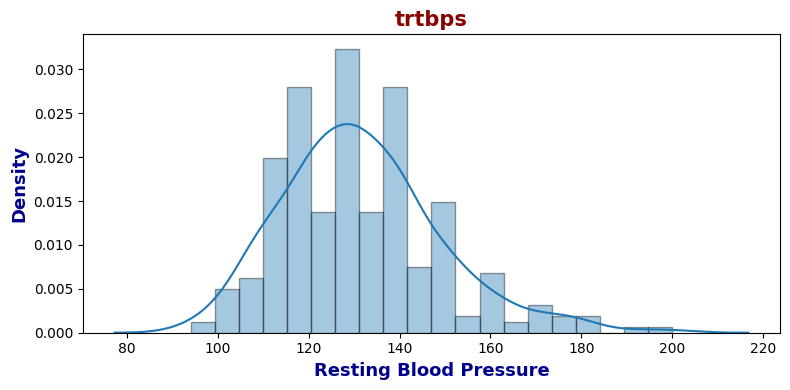

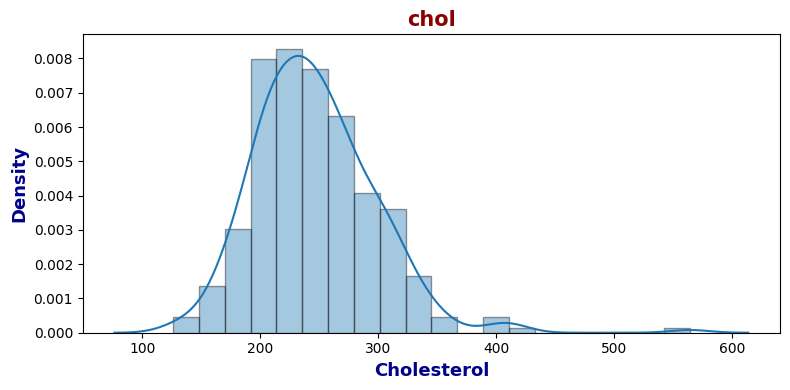

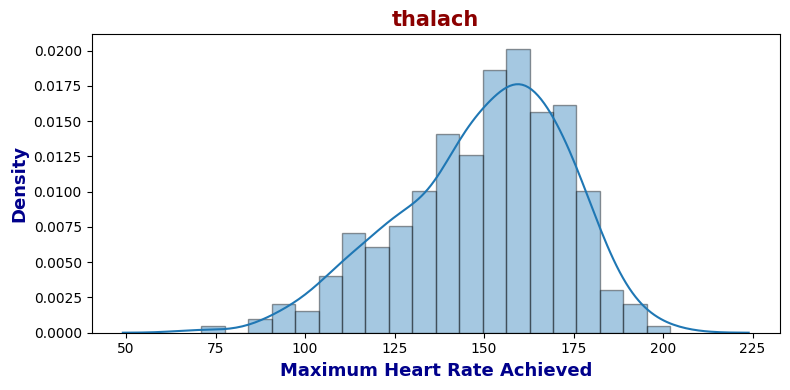

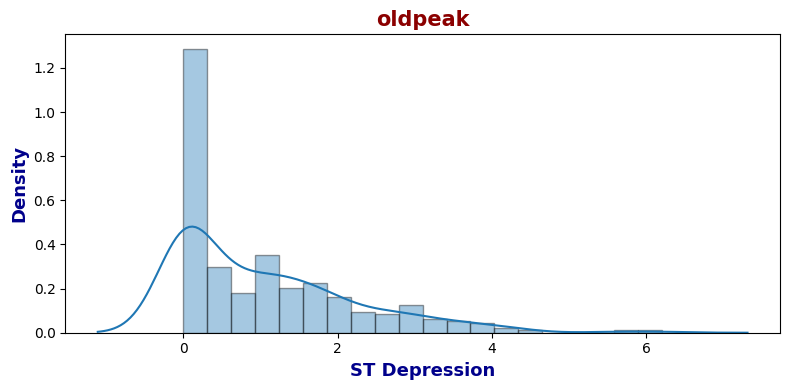

In [39]:
title_font = {"family" : "sans-serif", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "sans-serif", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 4), dpi = 100)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)

    plt.tight_layout()
    plt.show()

#### Analysis Outputs <a id = 20></a>


#### Age Variable
* The vast majority of patients are between 50 and 60.
* There is a remarkable place on the chart. There is a decrease in patients between the ages of 47-and 50.
* It looks like there are no outliers in the variable.

#### Trtbps Variable
* The resting blood pressure of most patients is generally between 110 and 140.
* Values after 180 can be considered as outliers.
* There is hefty patient traffic between 115-120, 125-130, and 155-160 values.

#### Cholesterol Variable
* Cholesterol value in most patients is between 200-and 280.
* Values after 380 can be considered as outliers.

#### Thalach Variable
* The maximum heart rate achieved in most patients is between 145-and 170.
* In particular, The values before 80 can be considered outliers.

#### Oldpeak Variable
* Values of the vast majority of patients in the variable range from 0 to 1.5.
* Especially values after 2.5 can be considered as outliers.

#### Categorical Variables(Analysis with **Pie Chart**) <a id = 21></a>


In [40]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [41]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [42]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

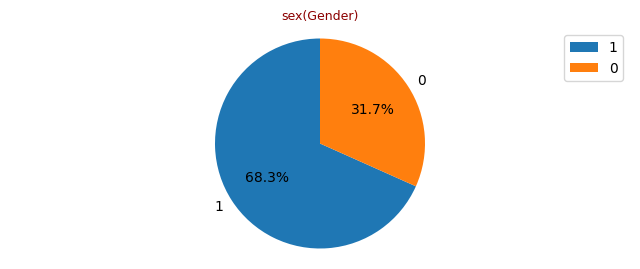

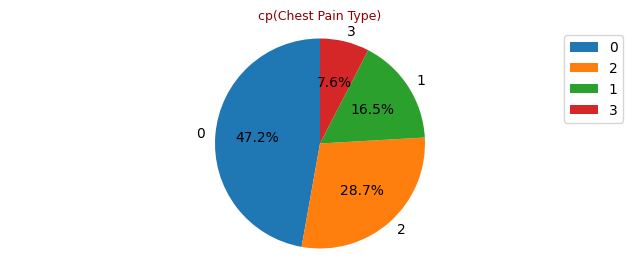

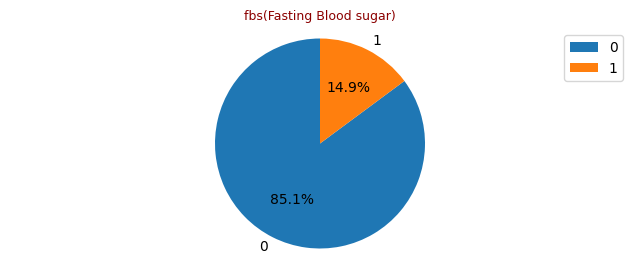

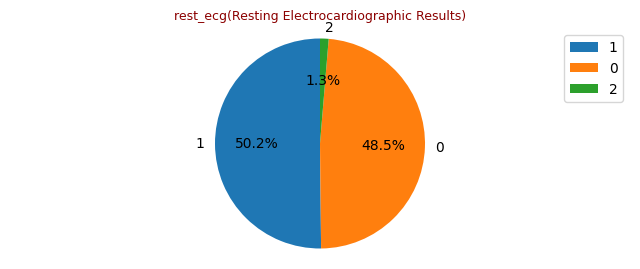

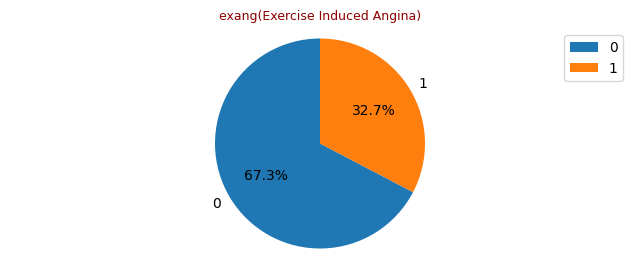

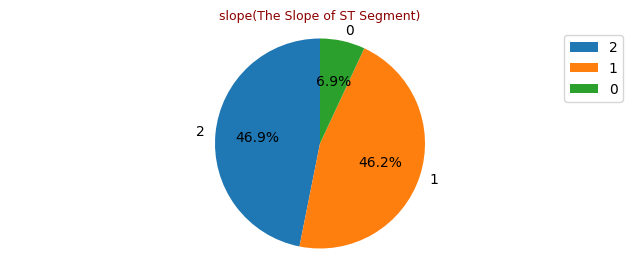

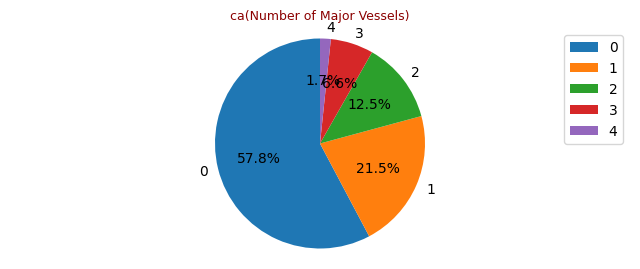

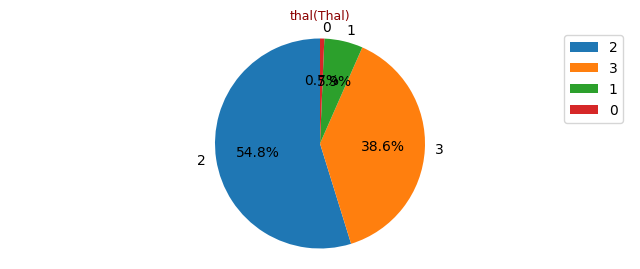

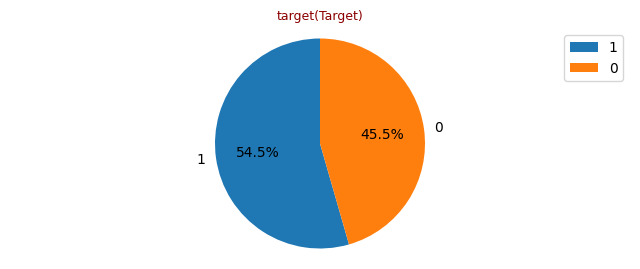

In [55]:
title_font = {"family" : "sans-serif", "color" : "darkred", "size" : 9}
axis_font = {"family" : "sans-serif", "color" : "darkblue", "size" : 9}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 3), dpi=100)

    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())

    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 90, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

#### Analysis Outputs <a id = 22></a>

#### Sex Variable
* **68.3%** of the patients are **male**, **31.7%** are **female**.
* So, the number of male patients is more than twice that of female patients.

#### Cp Variable
* Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina
* Half of the patients are asymptomatic; they have pain without symptoms.
* If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2.
* In other words, atypical angina is in **29%** of the patients.
* This observation value shows patients with shortness of breath or non-classical pain.
* The other two observation values are less than the others.
* **16.5%** of patients have a value of 1. In other words, typical angina is seen. Typical angina is the classic exertion pain that comes during any physical activity.
* The other **8%** has the value of non-anginal pain, which is three types of angina.
* Non-anginal pain is the term used to describe chest pain that is not caused by heart disease or a heart attack.

#### Fbs Variable
* The vast majority of patients have an observation value of 1. In other words, **85%**.
* The fasting blood sugar of these patients is more than 120 mg/dl.
* The remaining 15 percent have a less than 120 mg/dl fasting blood glucose level.

#### Rest_ecg Variable
* The thing that draws attention to the image of this variable is that the number of patients with two observation values is negligible.
* It has a value of **1.3 percent**. When we look at all of these patients, **it is not a very important number**.
* This value represents the ST and T wavelengths of the patients.
* Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal.
* The size of those with 1, that is, the orange part on the graph is **50.2%**
* This means that the resting electrocardiographic results of these patients are **normal**.
* The percentage of patients with a value of 0 is **48.5%**.
* That is, the patients' values of **48.5%** are **normal**.

#### Exang Variable
* We have said that this variable stands for exercise-induced angina.
* Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart.
* According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
* In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.

#### Slope Variable
* The minimum observation value is 0 with **7 percent**.
* This is patients with a downward slope of the ST wavelength.
* The other two observation values are almost equal to each other.
* The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.

#### Ca variable
* This variable is the number of great vessels colored by fluoroscopy.
* In more than half of the patients, **57.8 percent**, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent.
* After 0 observation value, the other value with the most slices in the pie chart 1
* The number of large vessels observed in **21.5%** of the patients is 1
* The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.

#### Thal Variable
* The "Thal" variable is short for the "Thallium stress test."
* The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.
* There are three observation values in the description of this variable. However, the pie chart shows four values. Values **0, 1, 2 and 3**.
* According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.
* In this context, according to the thallium stress test results, **54.8 percent** of the patients have two observation values, so the test result appears to be expected.
* **36.8 percent** has a value of **3**, so we can say that this value is a reversible defect as an explanation.
* **5.9 percent** of patients have a value of **1**, so the test result for these patients is a fixed defect.

#### Target Variable
* More than half of the patients, **54.5 percent**, have a heart attack risk. The remaining **45.5 percent** have no heart attack risk.

####  Examining the Missing Data According to the Analysis Result <a id = 23></a>


In [56]:
df[df["thal"] == 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [57]:
df["thal"] = df["thal"].replace(0, np.nan)

In [62]:
df['thal'].fillna(df['thal'].mean(), inplace=True)

In [63]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [64]:
df["thal"] = pd.to_numeric(df["thal"], downcast = "integer")

In [65]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


#### Bi-variate Analysis <a id = 24></a>


#### Numerical Variables - Target Variable(Analysis with FaceGrid) <a id = 25></a>

In [67]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [68]:
numeric_var.append("target")

In [69]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

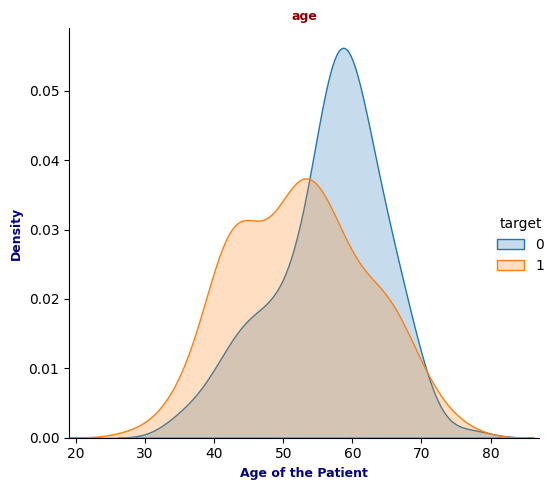

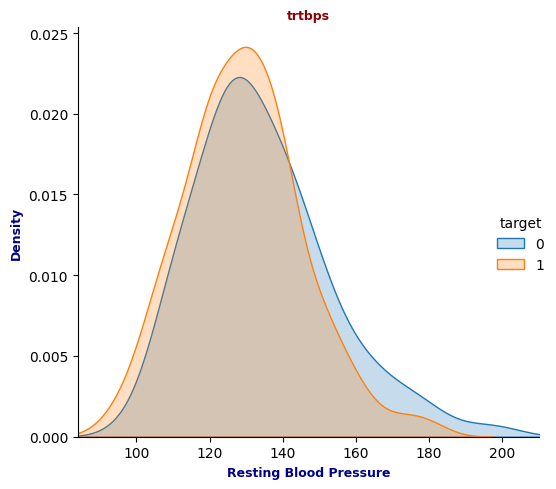

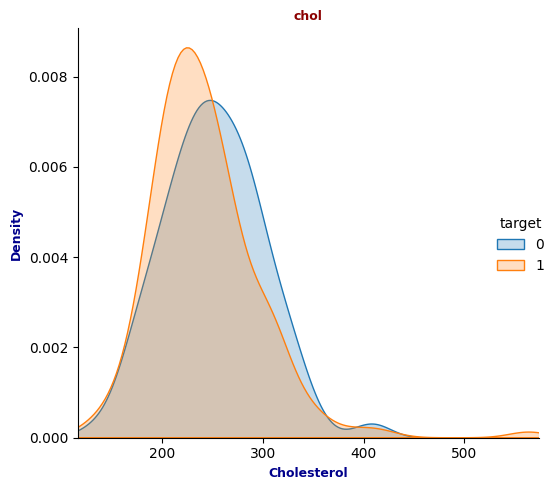

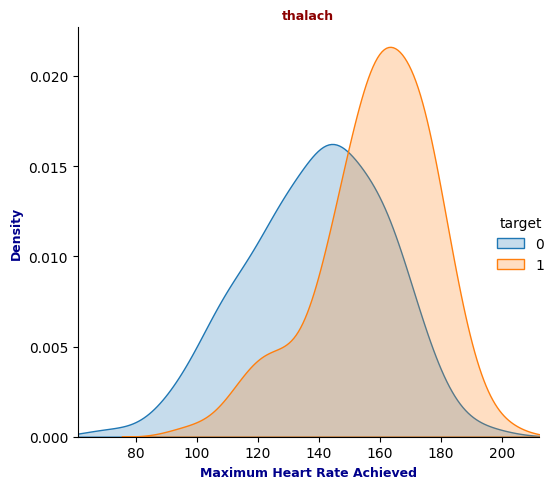

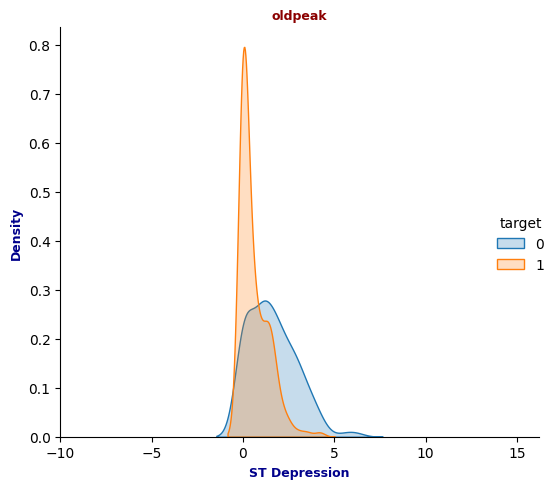

In [70]:
title_font = {"family" : "sans-serif", "color" : "darkred", "weight" : "bold", "size" : 9}
axis_font = {"family" : "sans-serif", "color" : "darkblue", "weight" : "bold", "size" : 9}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()

    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)

    plt.tight_layout()
    plt.show()

In [71]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [72]:
df[numeric_var].corr().iloc[:, [-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


In [88]:
df[categoric_var].corr().iloc[:, [-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


#### Analysis Outputs <a id = 26></a>

#### Note :
* The **KDE plot** shows the density of the feature for each value of the target variable. There are usually two-colored humps representing the two values of the Target variable. If the humps are well-separated and non-overlapping, there is a correlation with the Target. If the humps overlap a lot, that means the feature is not well-correlated with the Target because the Target is equally as common on those values of the feature.

#### Age - Target Variable

* There is some interesting data in this chart. Typically, the general belief is that heart attack increases with age.
* However, the graph tells us that we are wrong about this.
* If you have noticed, the number of people at risk of heart attack decreases as age progresses.
* Let's take 55 as a base. There is an incredible increase in the blue graph after 55. In other words, there is a decrease in heart attack risk after the age of 55.
* On the contrary, a decrease occurs after 55 in the orange graph. In other words, there is a decrease in the risk of heart attack after the age of 55.
* To summarize, It's just a general thought that older people may be more likely to have a heart attack, but from a graph of the age and target distribution, it's clear that this isn't the case.
* And **correlation** between them **-0.225439**. There is a **negative correlation**, which we can call **little**.

#### Trtbps - Target Variable

* It is complicated to predict whether a patient will have a heart attack from resting blood pressure data.
* Because if you notice, the two graphs are almost identical.
* For example, according to the "trtbps" value of two possibilities, 130 is the maximum point.
* Also, the Bumps on the graph overlap too much.
* This means that the feature does not correlate well with the Target variable. So, in summary, A patient with a "trtbps" value of 130 may or may not be likely to have a heart attack.
* And according to the graph, we can say that there is little correlation between the two variables. **Correlation between** them **-0.144931**. There is a **negative correlation**, which we can call **little**.

#### Chol - Target Variable

* In the graph, we can say that a cholesterol value of 200-250 is precarious for the patients.
* If you have noticed, especially at the beginning of the graph, patients with and without heart attack risk a similar image, while the increase in the probability of having a heart attack from 180 to 250 is noticeable.
* After the value of 250, it becomes difficult to differentiate the probability of patients having a heart attack.
* The **correlation** between the two variables is **-0.085239**. In other words, we can say that it is **negative**, but **very little**.

#### Thalach - Target Variable

* There is a situation that is evident in this graph.
* The higher the maximum reached heart rate, the higher the probability of the patient having a heart attack.
* If you have noticed, there is a parallel increase in the two possibilities up to 150. However, after a value of 150, patients with a low probability of having a heart attack decrease, while patients with a high-risk probability increase incredibly.
* It is evident in the distinction between the two bumps in the graph. This indicates that there is a correlation between the two variables.
* The **correlation** between the two variables is **0.421741**. In other words, we can say that it is **positive** and **moderate**.

#### Oldpeak - Target Variable

* When we look at the graph, if the value of this variable is between 0 and 1.5, there is a significant increase in the probability of having a heart attack.
* We can say that the range of 0 to 1.5 is the critical threshold for us.
* It is evident in the distinction between the two bumps in the graph. This indicates a correlation between the two variables.
* The **correlation** between the two variables is **-0.430696**. In other words, we can say that it is **negative** and **moderate**.

### Preparation for Modeling <a id = 39></a>


#### Dropping Columns with Low Correlation<a id = 40></a>

In [89]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)

#### Visualizing outliers <a id = 42></a>

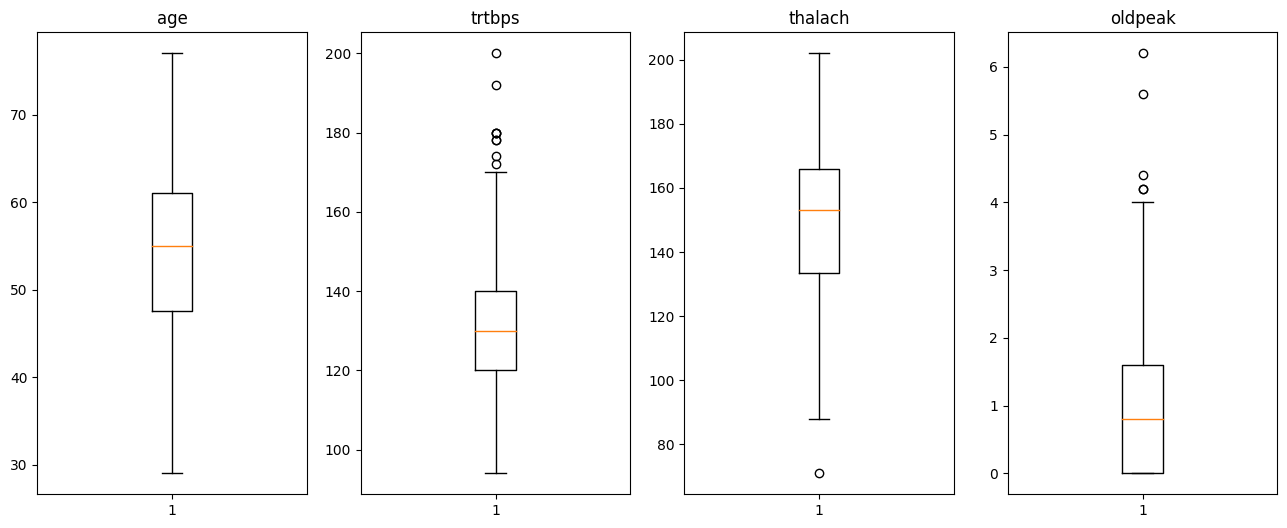

In [91]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (16, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

#### Analysis Outputs <a id = 43></a>

#### Age Variable

* We can see the exact image we want in this variable. There are no outliers. And the box stands at the midpoint of the whiskers.

#### Trtbps Variable

* There are more outliers in the "trtbps" variable than the others.
* In terms of distribution, an image is very prone to normal distribution. The box appears near the middle of the two whiskers.

#### Thalach Variable

* There are very few outliers. There is one outlier in part under the mustache.
* There is some closeness to the normal distribution in terms of distribution, but the box is slightly shifted upwards. It means that our data is somewhat concentrated on the right.
* In summary, we can say that there is a slight left skew.

#### Oldpeak Variable

* There is no such thing as a lower whisker in the Oldpeak variable. The bottom of the box is at the level of the lower mustache. It means that the values are concentrated on the left side. So we can say that there is a queue to the right. So there is a right skew.
* If we examine the mustache at the top, we can see the outliers above the mustache.

#### Dealing with outliers <a id = 44></a>


#### Trtbps Variable <a id = 45></a>

In [92]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [93]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [94]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [95]:
df[z_scores_trtbps > 2].trtbps.min()

170

In [96]:
df[df["trtbps"] < 170].trtbps.max()

165

In [97]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [98]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [99]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

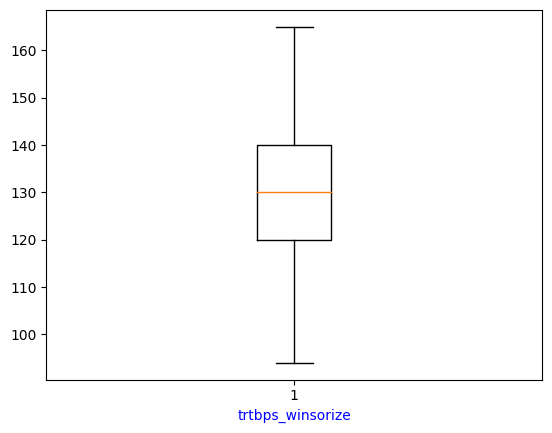

In [100]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [101]:
df["trtbps_winsorize"] = trtbps_winsorize

In [102]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


####  Thalach Variable <a id = 46></a>

In [103]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [104]:
thalach_out = iqr(df, "thalach")

In [105]:
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [106]:
df.drop([272], axis = 0, inplace = True)

In [107]:
df["thalach"][270:275]

,thalach
270,144
271,145
273,156
274,118
275,168


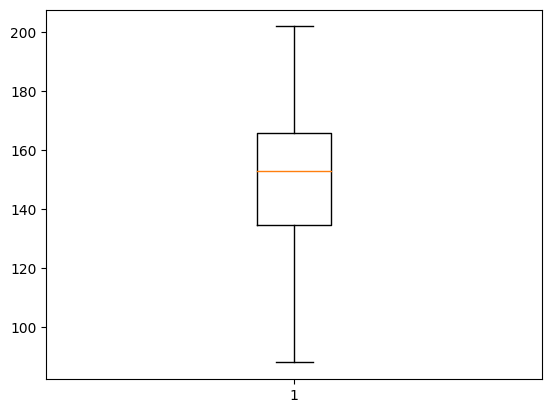

In [108]:
plt.boxplot(df["thalach"]);

#### Oldpeak Variable <a id = 47></a>

In [109]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [110]:
iqr(df, "oldpeak")

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [111]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

In [112]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [113]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

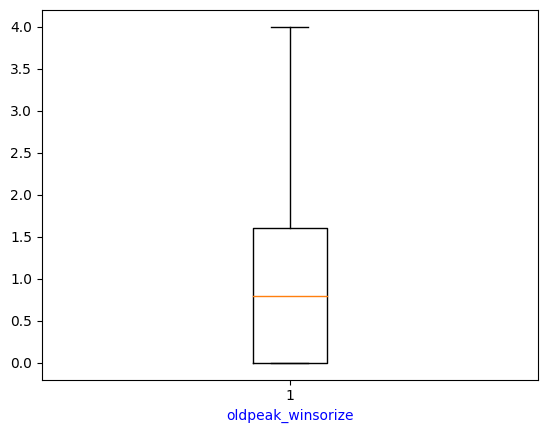

In [114]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [115]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [116]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [117]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

In [118]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


#### Determining Distributions of Numeric Variables<a id = 48></a>

In [ ]:
df.head()

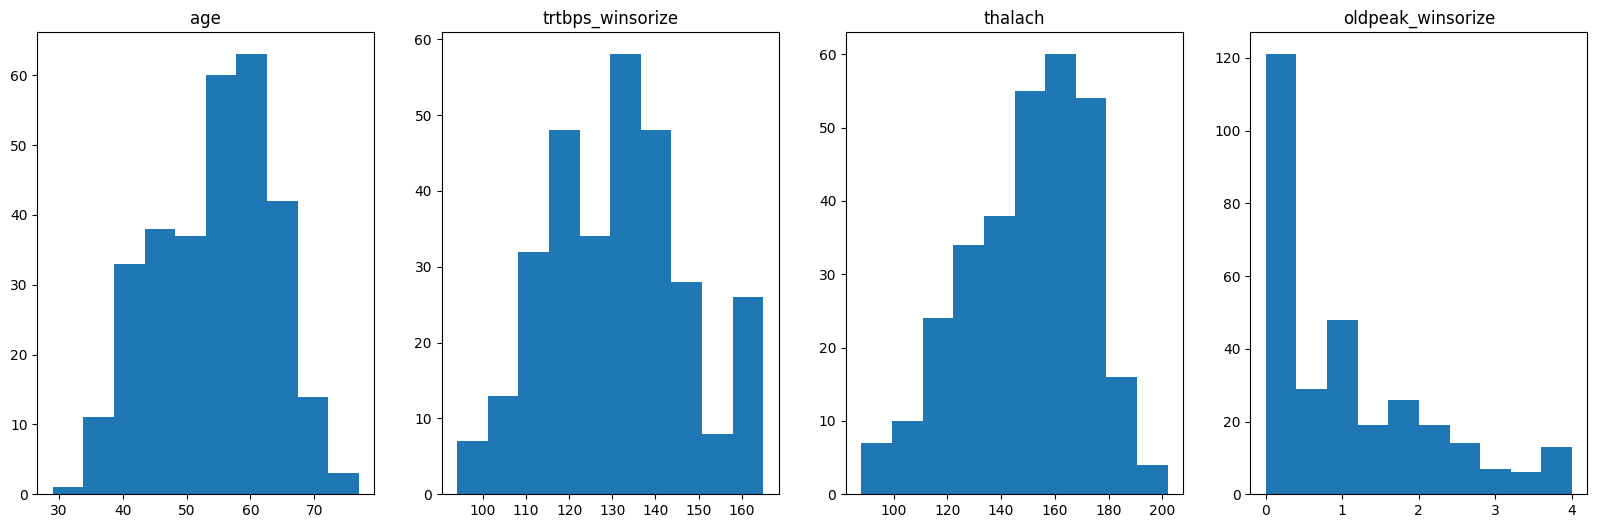

In [120]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [119]:
df[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


#### 5.4 Transformation Operations on Unsymmetrical Data<a id = 49></a>

In [121]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [122]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [123]:
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [124]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)

In [125]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


####  Applying One Hot Encoding Method to Categorical Variables<a id = 50></a>

In [126]:
df_copy = df.copy()

In [127]:
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [128]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [129]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [130]:
categoric_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [131]:
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)

In [132]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,True,False,False,True,False,False,False,False,False,False,False,False,False
1,37,187,1,130,1.870829,True,False,True,False,False,False,False,False,False,False,False,True,False
2,41,172,1,130,1.183216,False,True,False,False,False,False,True,False,False,False,False,True,False
3,56,178,1,120,0.894427,True,True,False,False,False,False,True,False,False,False,False,True,False
4,57,163,1,120,0.774597,False,False,False,False,True,False,True,False,False,False,False,True,False


####  Feature Scaling with the RobustScaler Method for Machine Learning Algorithms<a id = 51></a>

In [133]:
new_numeric_var = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [134]:
robus_scaler = RobustScaler()

In [135]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [136]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.309091,1.079365,1,0.00,0.771913,True,False,True,False,False,False,False,False,False,False,False,True,False
2,-1.018182,0.603175,1,0.00,0.228308,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0.072727,0.793651,1,-0.50,0.000000,True,True,False,False,False,False,True,False,False,False,False,True,False
4,0.145455,0.317460,1,-0.50,-0.094734,False,False,False,False,True,False,True,False,False,False,False,True,False


####  Separating Data into Test and Training Set<a id = 52></a>


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [140]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
201,0.363636,-0.380952,-0.25,0.615769,True,False,False,False,True,True,False,True,False,False,False,False,True
82,0.363636,0.222222,-1.40,-0.707107,False,False,True,False,False,False,True,True,False,False,False,True,False
187,-0.072727,-1.396825,-0.30,0.465497,True,False,False,False,True,True,False,True,False,False,False,False,True
259,-1.236364,0.920635,-0.50,0.833997,True,False,False,True,True,True,False,False,False,False,False,False,True
5,0.145455,-0.158730,0.50,-0.207107,True,False,False,False,False,True,False,False,False,False,False,False,False


In [141]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [142]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


### 6. Modelling <a id = 53></a>

#### Logistic Regression Algorithm <a id = 54></a>


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [144]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [145]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [146]:
y_pred = log_reg.predict(X_test)

In [147]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [148]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


####  Cross Validation <a id = 55></a>

In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8666666666666666


####  Roc Curve and Area Under Curve(AUC) <a id = 56></a>

In [152]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

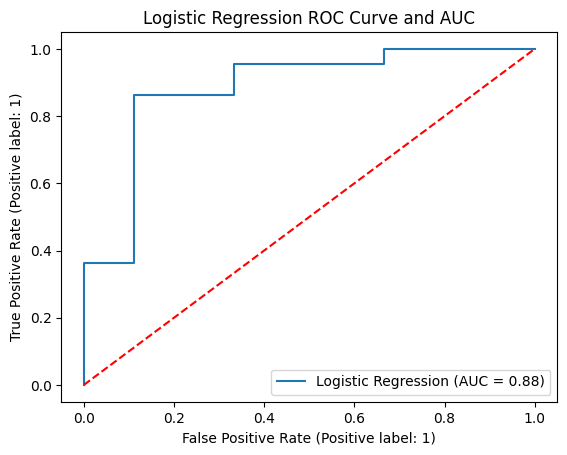

In [154]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
roc_display = RocCurveDisplay.from_predictions(y_test, y_prob, name="Logistic Regression")
plt.title("Logistic Regression ROC Curve and AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

####  Hyperparameter Optimization(**with GridSearchCV**) <a id = 57></a>

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [157]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [158]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [159]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [160]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [161]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [162]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [163]:
y_pred = log_reg_new2.predict(X_test)

In [164]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


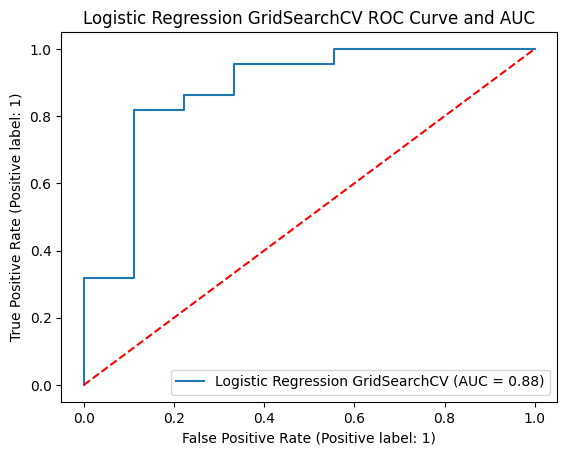

In [166]:
y_prob = log_reg_new2.predict_proba(X_test)[:, 1]

# Create ROC curve display
roc_display = RocCurveDisplay.from_predictions(y_test, y_prob, name="Logistic Regression GridSearchCV")

# Customize the plot
plt.title("Logistic Regression GridSearchCV ROC Curve and AUC")
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line representing random classifier
plt.show()

####  Decision Tree Algorithm <a id = 58></a>

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [169]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [170]:
y_pred = dec_tree.predict(X_test)

In [171]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.8387096774193549


In [172]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333333


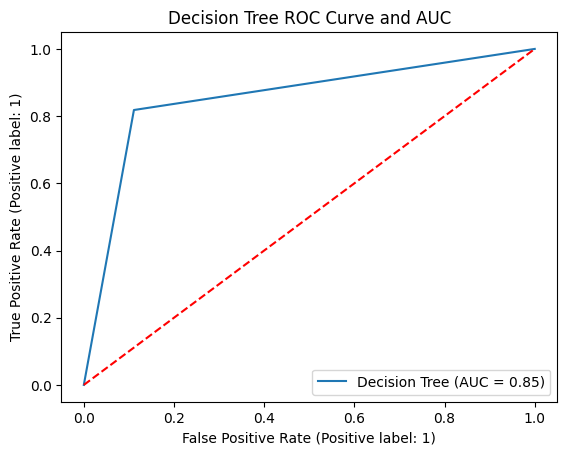

In [173]:
y_prob = dec_tree.predict_proba(X_test)[:, 1]

# Create ROC curve display
roc_display = RocCurveDisplay.from_predictions(y_test, y_prob, name="Decision Tree")

# Customize the plot
plt.title("Decision Tree ROC Curve and AUC")
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line representing random classifier
plt.show()


#### Support Vector Machine Algorithm <a id = 59></a>

In [174]:
from sklearn.svm import SVC

In [175]:
svc_model = SVC(random_state = 5)

In [176]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [177]:
y_pred = svc_model.predict(X_test)

In [178]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8709677419354839


In [179]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333334


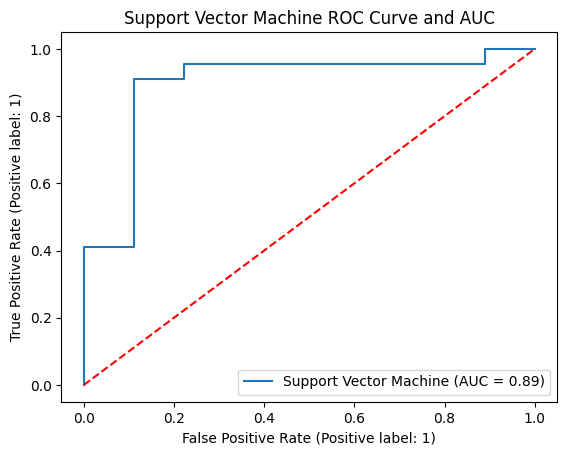

In [180]:
 y_scores = svc_model.decision_function(X_test)

# Create ROC curve display
roc_display = RocCurveDisplay.from_predictions(y_test, y_scores, name="Support Vector Machine")

# Customize the plot
plt.title("Support Vector Machine ROC Curve and AUC")
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line representing random classifier
plt.show()

####  Random Forest Algorithm <a id = 60></a>

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
random_forest = RandomForestClassifier(random_state = 5)

In [183]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [184]:
y_pred = random_forest.predict(X_test)

In [185]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8387096774193549


In [186]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8999999999999998


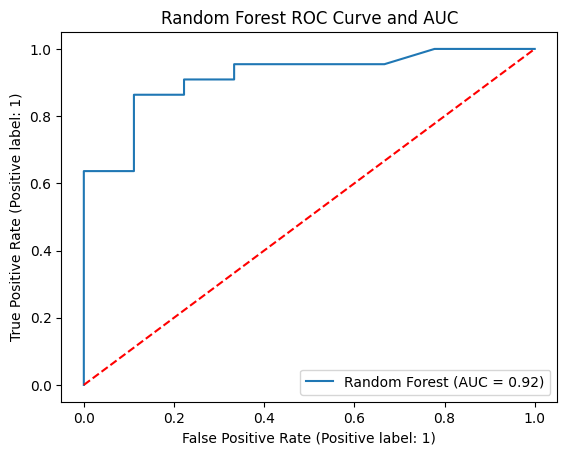

In [187]:
y_prob = random_forest.predict_proba(X_test)[:, 1]

# Create ROC curve display
roc_display = RocCurveDisplay.from_predictions(y_test, y_prob, name="Random Forest")

# Customize the plot
plt.title("Random Forest ROC Curve and AUC")
plt.plot([0, 1], [0, 1], "r--")  # Diagonal line representing random classifier
plt.show()

####  Hyperparameter Optimization(**with GridSearchCV**) <a id = 61></a>

In [188]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [189]:
parameters = {"n_estimators" : [50, 100, 150, 200],
              "criterion" : ["gini", "entropy"],
              'max_features': ['auto', 'sqrt', 'log2'],
              'bootstrap': [True, False]}

In [190]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [191]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [192]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


In [193]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 200, random_state = 5)

In [196]:
from sklearn.ensemble import RandomForestClassifier

random_forest_new2 = RandomForestClassifier(
    bootstrap=True,
    criterion="entropy",
    max_features=None,  # Changed from 'auto' to None
    n_estimators=200,
    random_state=5
)

random_forest_new2.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=200,
                       random_state=5)

In [197]:
y_pred = random_forest_new2.predict(X_test)

In [198]:
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest after hyper-parameter tuning is: 0.8064516129032258


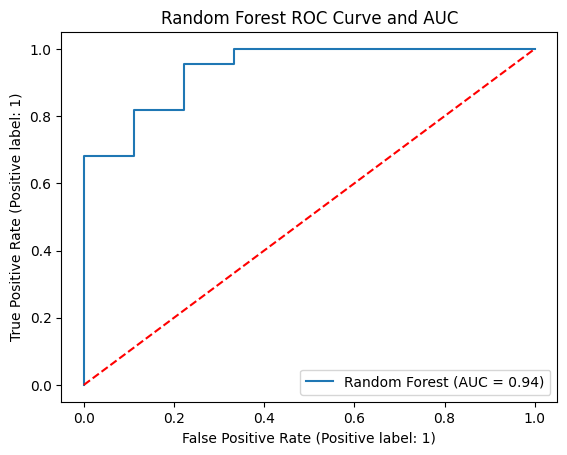

In [199]:
RocCurveDisplay.from_estimator(random_forest_new2, X_test, y_test, name="Random Forest")
plt.title("Random Forest ROC Curve and AUC")
plt.plot([0, 1], [0, 1], "r--")  # Plotting the diagonal line for reference
plt.show()

###  Project Conclusion <a id = 62></a>

**The activities we carried out within the scope of the project are as follows:**
1. Within the scope of the project, we first made the data set ready for **Exploratory Data Analysis(EDA)**
2. We performed **Exploratory Data Analysis(EDA)**.
3. We analyzed numerical and categorical variables within the scope of univariate analysis by using **Distplot** and **Pie Chart** graphics.
4. Within the scope of bivariate analysis, we analyzed the variables among each other using **FacetGrid, Count Plot, Pair Plot, Swarm plot, Box plot, and Heatmap** graphics.
5. We made the data set ready for the model. In this context, we struggled with **missing** and **outlier** values.
6. We used **four different algorithms** in the model phase.
7. We got **87% accuracy** and **88% AUC** with the **Logistic Regression model**.
8. We got **83% accuracy** and **85% AUC** with the **Decision Tree Model**.
9. We got **83% accuracy** and **89% AUC** with the **Support Vector Classifier Model**.
10. And we got **90.3% accuracy** and **94% AUC** with the **Random Forest Classifier Model**.
11. When all these model outputs are evaluated, we **prefer** the model we created with the **Random Forest Algorithm**, which gives the **best results**.

